# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Data visualization

In [2]:
df = pd.read_csv("data.csv")

df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
sns.set(style="whitegrid")

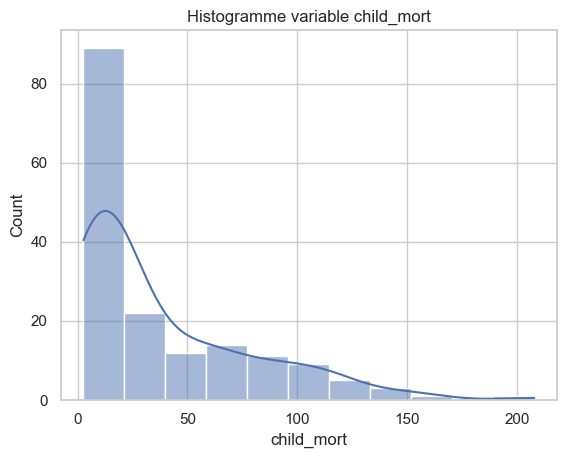

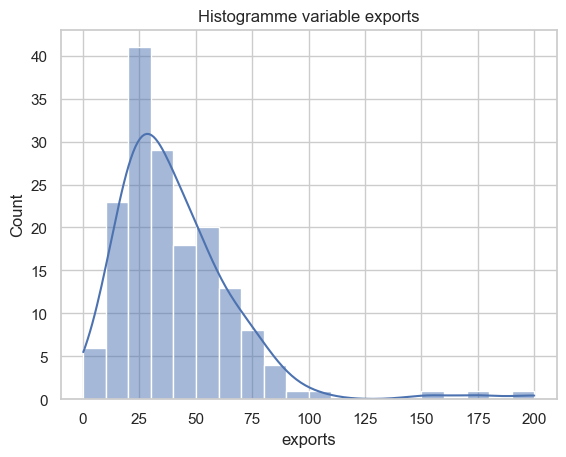

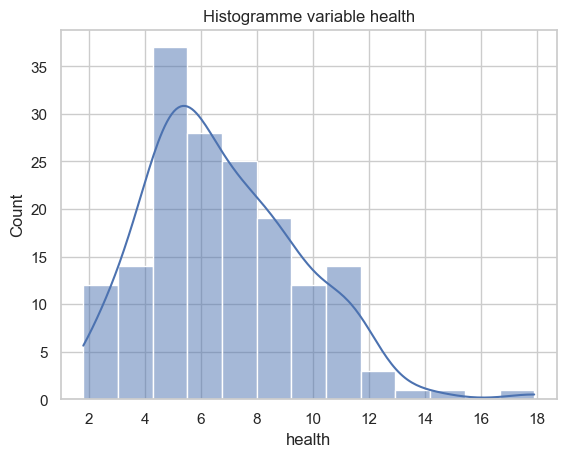

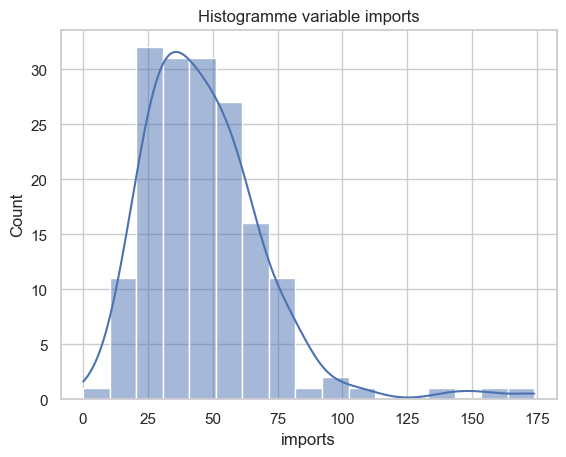

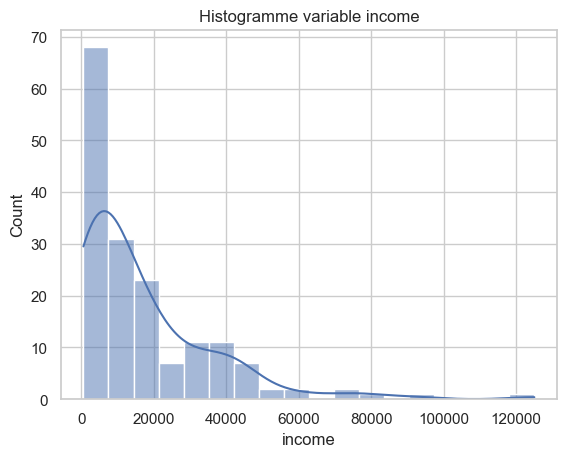

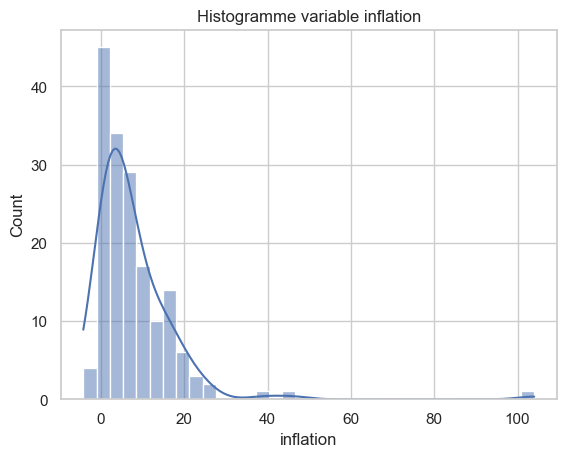

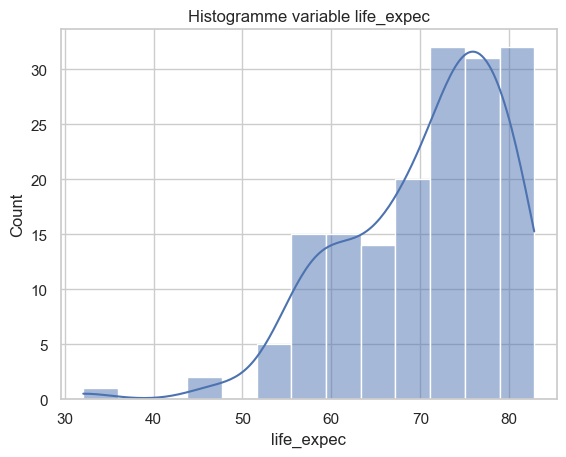

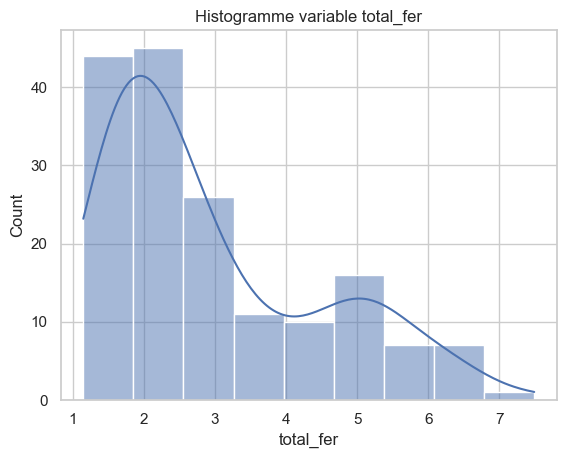

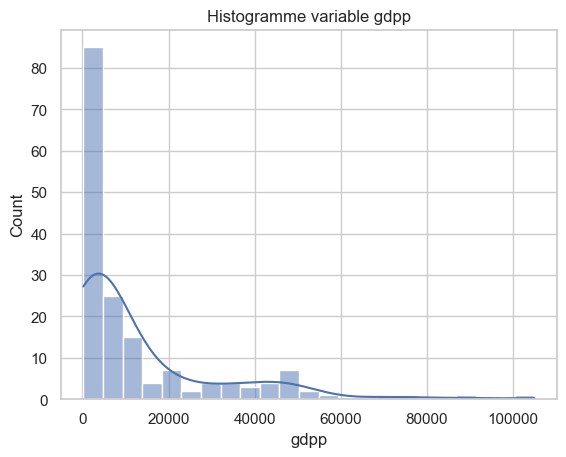

In [6]:
df_1 = df.drop(['country'], axis=1)

for col in df_1.columns : 
    plt.figure()
    plt.title(f'Histogramme variable {col}')
    sns.histplot(df_1,x=col,kde=True)

<Axes: >

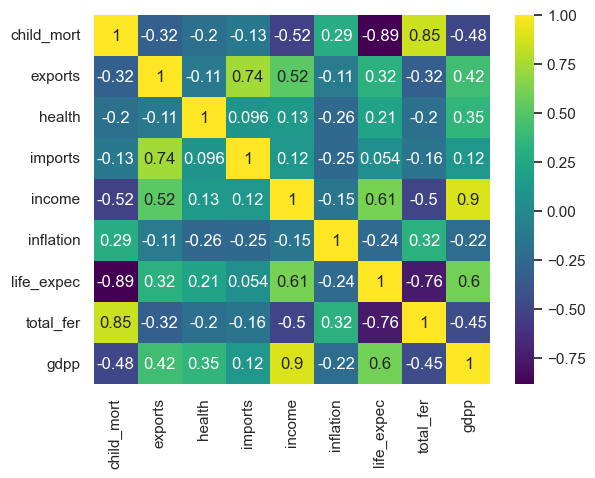

In [7]:
sns.heatmap(df_1.corr(),annot=True,cmap='viridis')

c:\Users\blind\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (139) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
c:\Users\blind\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (139) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
c:\Users\blind\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (139) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
c:\Users\blind\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (139) and will cycle, which may produce an uninterpretable plot.
  func(

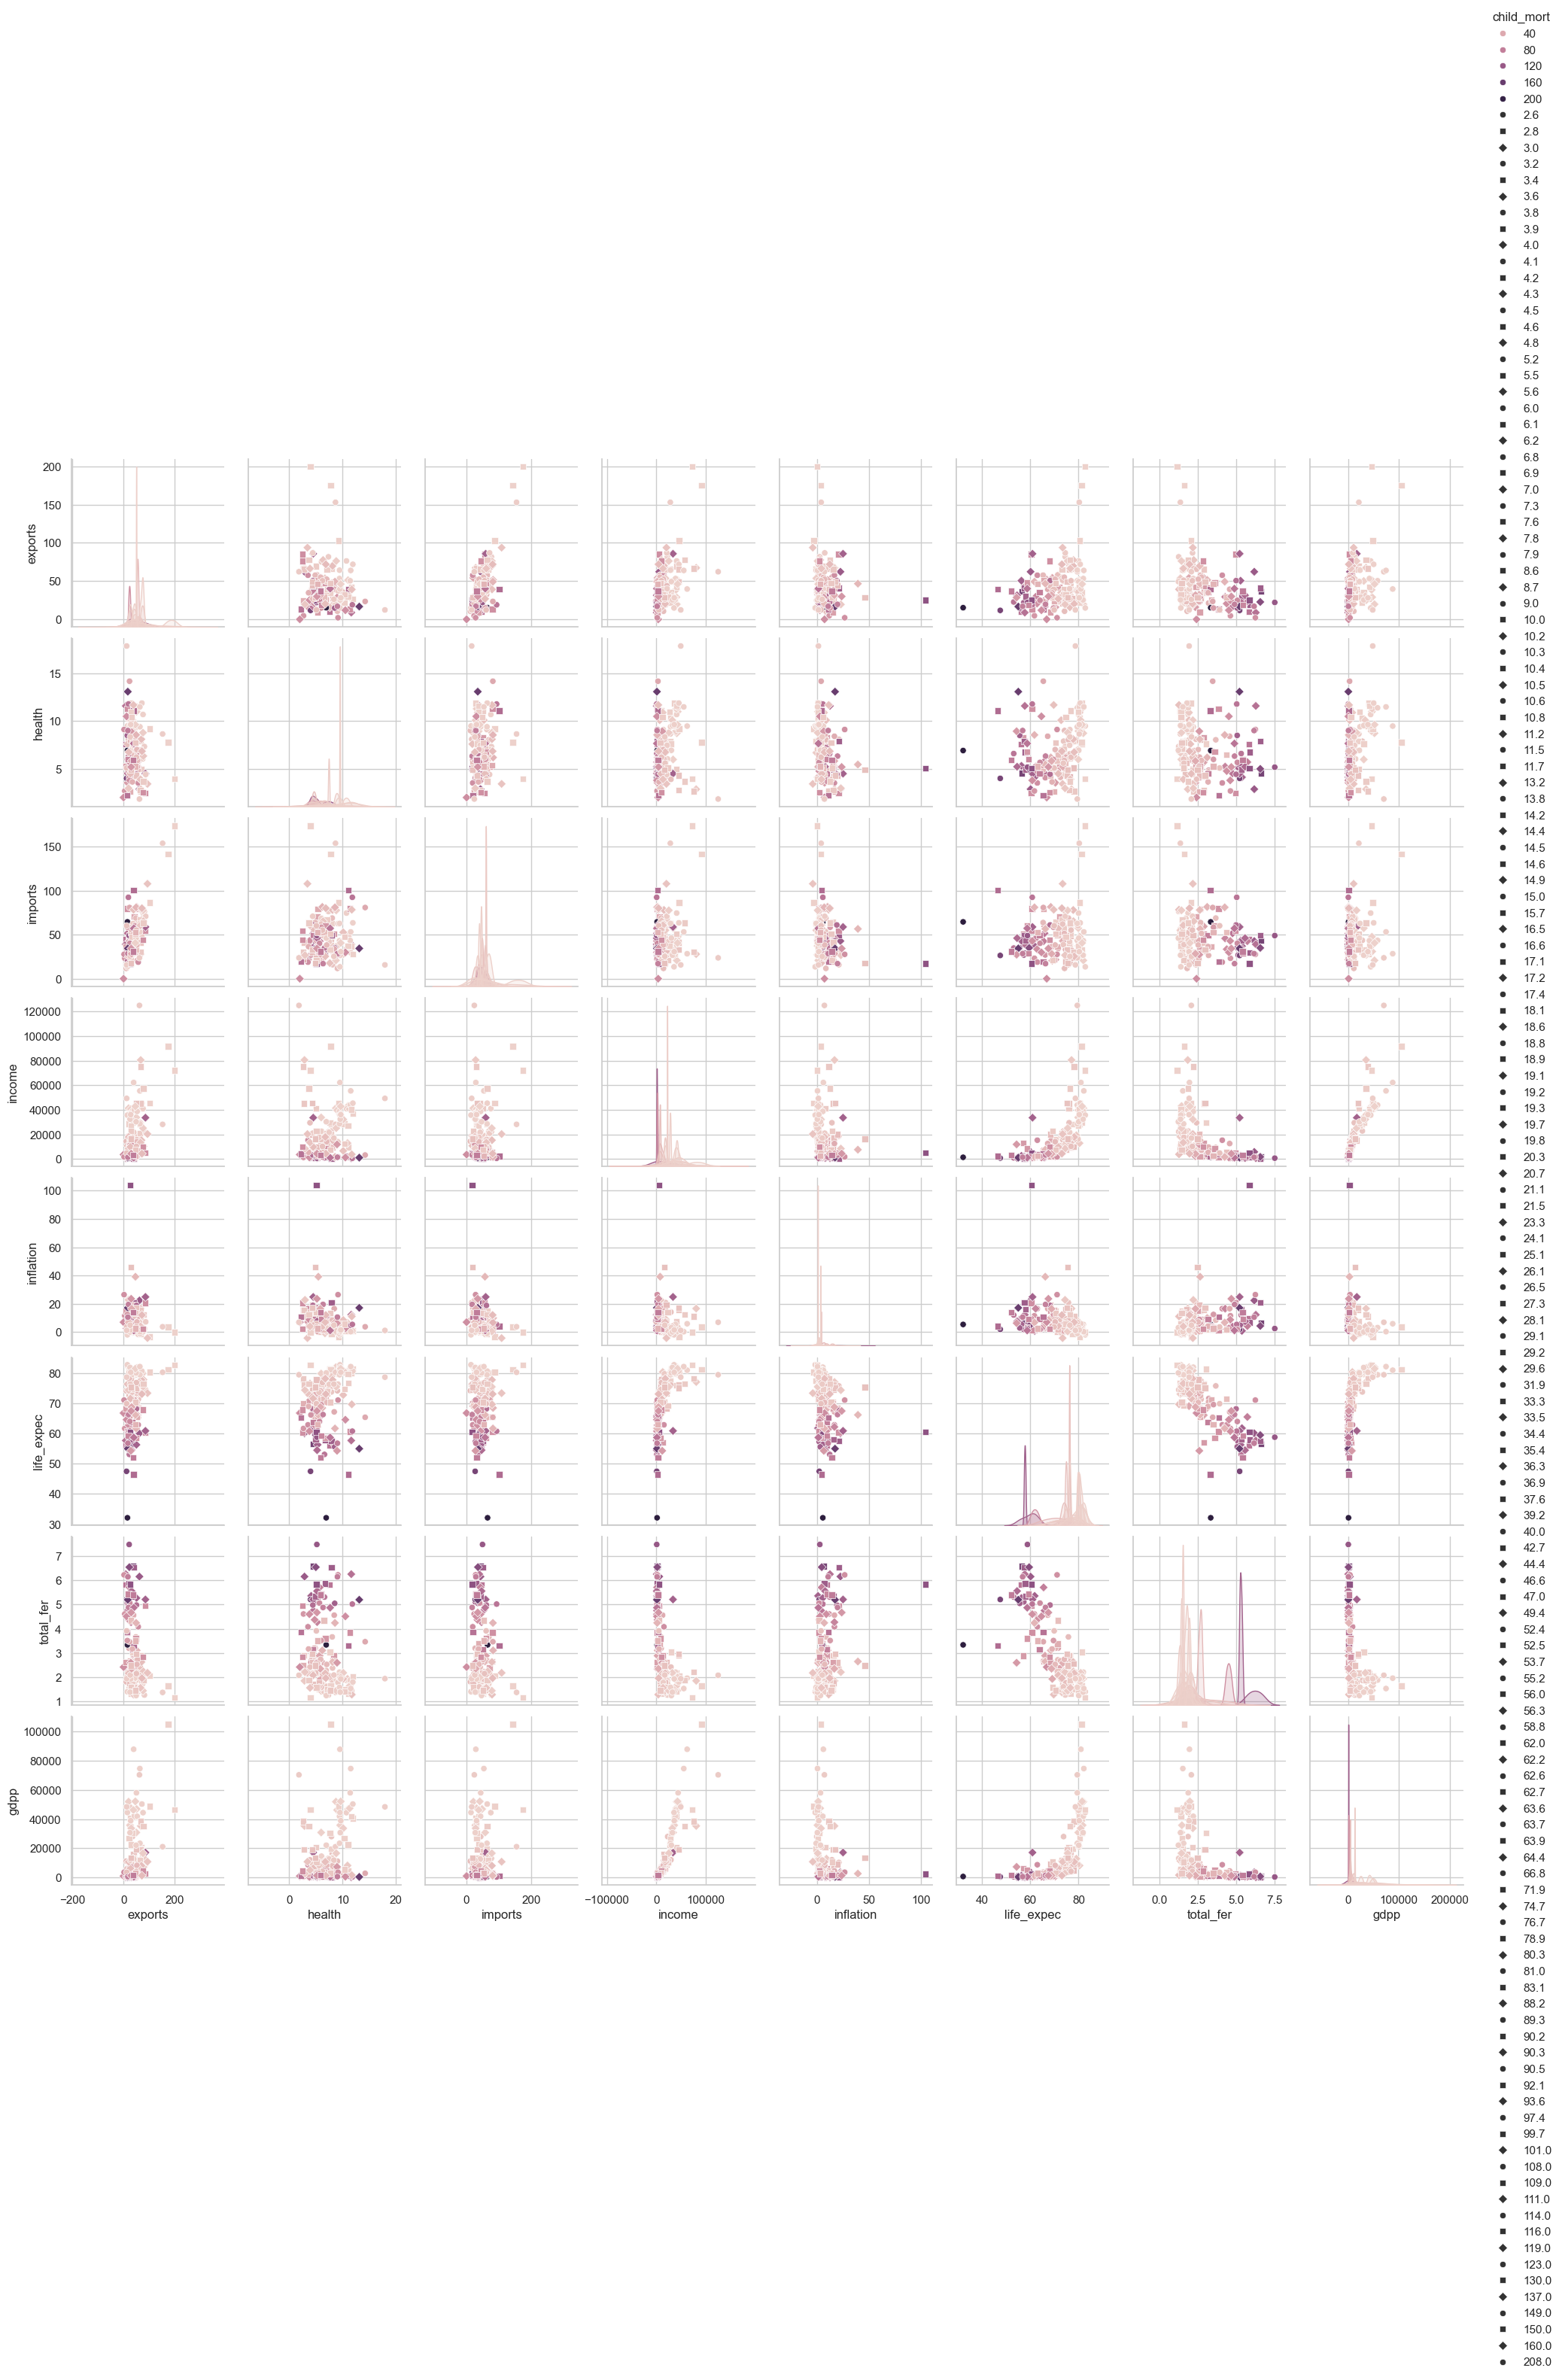

In [8]:
sns.pairplot(df, hue="child_mort", markers=["o", "s", "D"])
plt.show()

In [9]:
scaler = StandardScaler()
X_std = scaler.fit_transform(df_1)

pd.DataFrame(X_std).head()

,0,1,2,3,4,5,6,7,8
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [10]:
cov_matrix = np.cov(X_std.T)
print("Covariance Matrix:\n", cov_matrix)

Covariance Matrix:
 [[ 1.0060241  -0.32000945 -0.2016093  -0.12797725 -0.52747354  0.29001277
  -0.89201752  0.85358942 -0.485942  ]
 [-0.32000945  1.0060241  -0.11509761  0.74182289  0.51989676 -0.10794074
   0.3182181  -0.32193832  0.42124719]
 [-0.2016093  -0.11509761  1.0060241   0.09629328  0.1303592  -0.2569142
   0.21196135 -0.19785877  0.34804965]
 [-0.12797725  0.74182289  0.09629328  1.0060241   0.12314364 -0.2484822
   0.05471819 -0.16000656  0.11619394]
 [-0.52747354  0.51989676  0.1303592   0.12314364  1.0060241  -0.14864609
   0.61564899 -0.50486319  0.90096644]
 [ 0.29001277 -0.10794074 -0.2569142  -0.2484822  -0.14864609  1.0060241
  -0.24114897  0.31883023 -0.22296618]
 [-0.89201752  0.3182181   0.21196135  0.05471819  0.61564899 -0.24114897
   1.0060241  -0.76545827  0.60370413]
 [ 0.85358942 -0.32193832 -0.19785877 -0.16000656 -0.50486319  0.31883023
  -0.76545827  1.0060241  -0.45765069]
 [-0.485942    0.42124719  0.34804965  0.11619394  0.90096644 -0.22296618
   0.

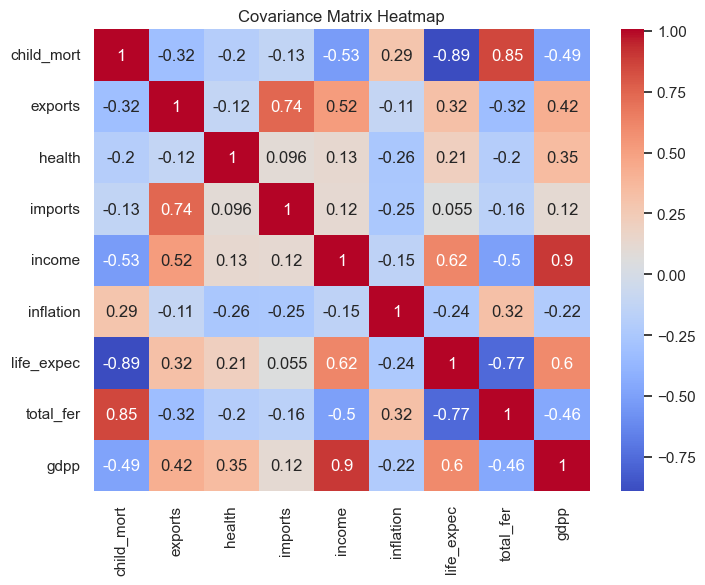

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, cmap="coolwarm", xticklabels=df_1.columns, yticklabels=df_1.columns)
plt.title("Covariance Matrix Heatmap")
plt.show()

In [12]:
# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues: [4.16057017 1.55566165 1.1774338  1.00077724 0.66459866 0.224928
 0.1141221  0.08884738 0.06727787]
Eigenvectors:
 [[-0.41951945  0.19288394 -0.02954353  0.37065326  0.16896968  0.20062815
  -0.07948854  0.68274306  0.3275418 ]
 [ 0.28389698  0.61316349  0.14476069  0.00309102 -0.05761584 -0.05933283
  -0.70730269  0.01419742 -0.12308207]
 [ 0.15083782 -0.24308678 -0.59663237  0.4618975  -0.51800037  0.00727646
  -0.24983051 -0.07249683  0.11308797]
 [ 0.16148244  0.67182064 -0.29992674 -0.07190746 -0.25537642 -0.03003154
   0.59218953  0.02894642  0.09903717]
 [ 0.39844111  0.02253553  0.3015475   0.39215904  0.2471496   0.16034699
   0.09556237 -0.35262369  0.61298247]
 [-0.19317293 -0.00840447  0.64251951  0.15044176 -0.7148691   0.06628537
   0.10463252  0.01153775 -0.02523614]
 [ 0.42583938 -0.22270674  0.11391854 -0.20379723 -0.1082198  -0.60112652
   0.01848639  0.50466425  0.29403981]
 [-0.40372896  0.15523311  0.01954925  0.37830365  0.13526221 -0.75068875
   0.02

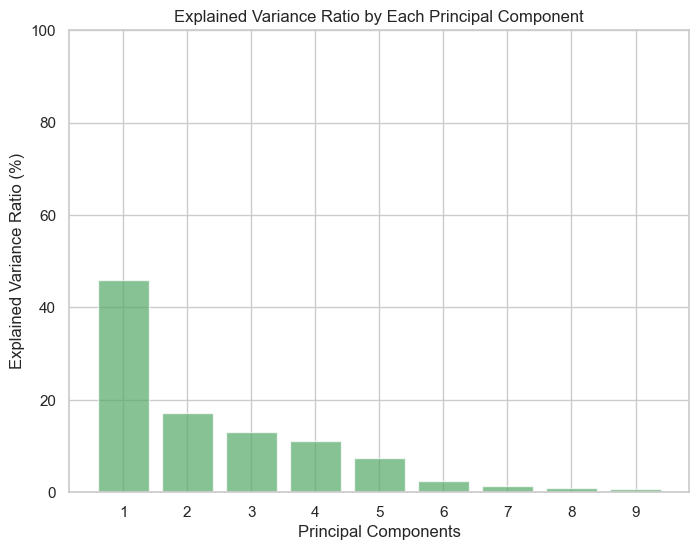

In [13]:
# Normalize eigenvalues to get explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Create a bar plot to visualize the explained variance ratio (percentage)
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio * 100, alpha=0.7, color='g')
plt.title('Explained Variance Ratio by Each Principal Component')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio (%)')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.ylim(0, 100)  # Set Y-axis from 0% to 100%
plt.show()

# Applying PCA

In [14]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Show the explained variance ratio
print("Explained Variance Ratios:", pca.explained_variance_ratio_)


Explained Variance Ratios: [0.4595174  0.17181626]


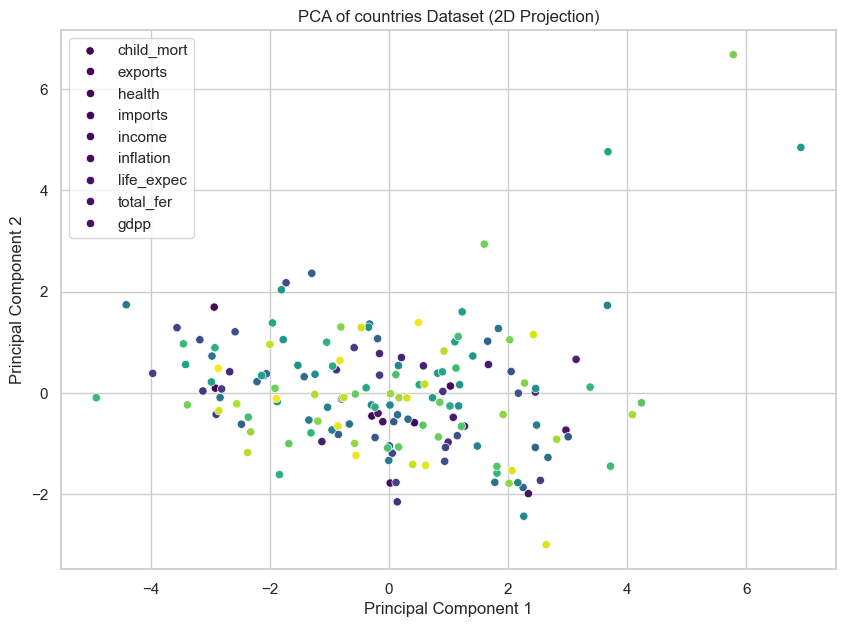

In [15]:
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['country'] = df['country']

# Plot the 2D projection
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='country', palette="viridis", data=pca_df, legend='full')
plt.title("PCA of countries Dataset (2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(df_1.columns)
plt.show()

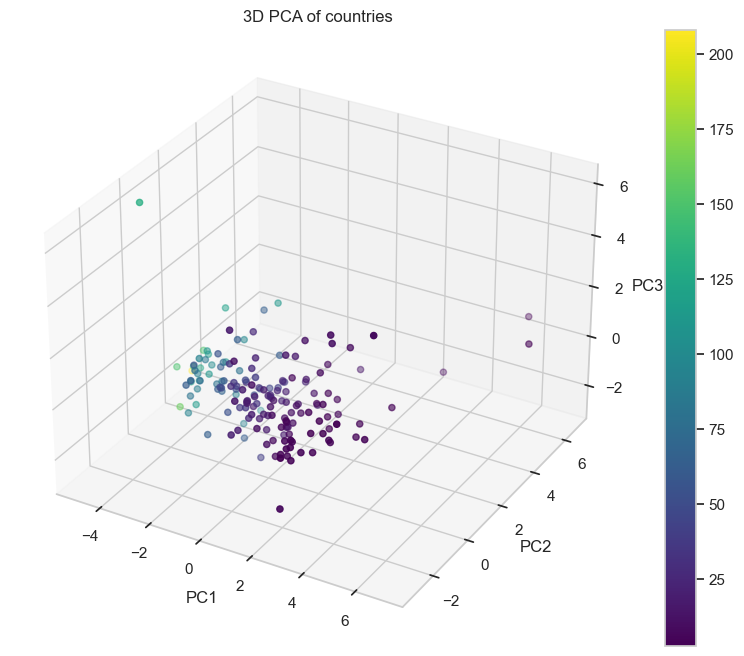

In [16]:
# Apply PCA with 3 components
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_std)

# Plot in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=df["child_mort"], cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title("3D PCA of countries")
plt.colorbar(scatter)
plt.show()

# Training

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.multioutput import MultiOutputRegressor

df = pd.read_csv('data.csv')

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['country'])
y = df.drop(columns='country')
print(X.shape)

(167, 193)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = MultiOutputRegressor(RandomForestRegressor())
model.fit(X_train, y_train)


MultiOutputRegressor(estimator=RandomForestRegressor())

In [20]:
y_pred = model.predict(X_test)

In [21]:
r2 = r2_score(y_pred, y_test, multioutput='uniform_average')

print(f'R2 SCORE: {r2}')

R2 SCORE: -55479.39555450141
